# Tutorial

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd


# Logistic Regression

In [5]:
dataset = load_breast_cancer(as_frame=True)

X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)


model=LogisticRegression()
model=model.fit(X_train,y_train)
predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))
print(dataset)


True Positive(TP)  =  86
False Positive(FP) =  2
True Negative(TN)  =  51
False Negative(FN) =  4
Accuracy of the binary classifier = 0.958
{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11

In [4]:
dataset['data'].head()
# dataset['target'].head()
# dataset['target'].value_counts()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

# Others

In [5]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Calculating analytics for models
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

# Construction of table with analytics

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model


Accuracy  Precision    Recall
Logistic Regression      0.958042   0.955556  0.977273
Support Vector Machines  0.937063   0.933333  0.965517
Decision Trees           0.923077   0.900000  0.975904
Random Forest            0.965035   0.955556  0.988506
Naive Bayes              0.937063   0.955556  0.945055
K-Nearest Neighbor       0.951049   0.988889  0.936842

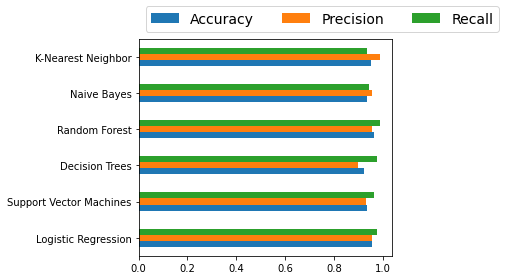

In [6]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()


# Analysis of Data

In [7]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

path='data_dump/2020_reflectometry.hdf5'

f = h5py.File(path, 'r')
df = pd.DataFrame(np.array(h5py.File(path,'r')['37017']['REF']['rho_poloidal_hfs']))

<frozen importlib._bootstrap>:219: RuntimeWarning: mpi4py.MPI.File size changed, may indicate binary incompatibility. Expected 32 from C header, got 40 from PyObject


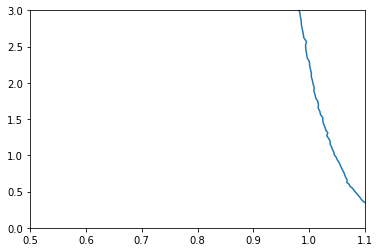

In [8]:
x=f['37017']['REF']['rho_poloidal_lfs'][9000][:]
y=f['37017']['REF']['density'][:]*10**-19
plt.plot(x,y)
plt.xlim([0.5, 1.1])
plt.ylim([0,3])
plt.show()

In [9]:
dataset=f['37017']['REF']['rho_poloidal_hfs']
print(dataset.shape)
print(dataset.size)
print(dataset.ndim)
print(dataset.dtype)
print(dataset.attrs)

(11794, 151)
1780894
2
float32
<Attributes of HDF5 object at 139899224949760>


In [10]:

keys1=list(f.keys())

dset=f[keys1[0]]['REF']['rho_poloidal_hfs']

# for key in keys1:
#     print(f[key]['REF']['rho_poloidal_hfs'].shape)
#     keys2=list(f[key].keys())
#     print(f[key].get())
# print(keys1)
# keys2
#dset.shape
dset[1000:1100,70]

array([0.5530888 , 0.5494684 , 0.55061674, 0.51271063, 0.4996622 ,
       0.51371574, 0.51139843, 0.54291165, 0.55110663, 0.5432008 ,
       0.5286426 , 0.5348391 , 0.5037406 , 0.5021145 , 0.48959357,
       0.49745238, 0.53299713, 0.5369355 , 0.54058075, 0.540722  ,
       0.53976953, 0.5047948 , 0.4959497 , 0.5173857 , 0.50002146,
       0.50632685, 0.52967227, 0.5175097 , 0.5177225 , 0.51711035,
       0.51632667, 0.519459  , 0.50992316, 0.48188528, 0.47581244,
       0.45846978, 0.4780406 , 0.49439657, 0.48130703, 0.51392245,
       0.5010027 , 0.48278728, 0.5110511 , 0.507677  , 0.5017725 ,
       0.50212485, 0.49960566, 0.49874094, 0.5003005 , 0.48987782,
       0.49132845, 0.45732445, 0.47174078, 0.46521387, 0.50834143,
       0.50356567, 0.5071867 , 0.492494  , 0.49890792, 0.5163816 ,
       0.48694697, 0.498734  , 0.4817915 , 0.48414618, 0.49889475,
       0.48134488, 0.46000263, 0.46031013, 0.5252172 , 0.50795376,
       0.5121807 , 0.5049945 , 0.5295008 , 0.48294413, 0.48161

In [11]:
def printname(name):
    print(name)
def printname2(name,val):
    print(name,val)


In [12]:
# Gives you all of the folders paths
# f.visit(printname)
# Gives you all of the shapes of each path
# f.visititems(printname2)

In [13]:
t_max, n_max=f['37017']['REF']['rho_poloidal_hfs'].shape
labels=np.zeros(t_max)

In [14]:
f.create_dataset('label',dtype=np.float32,data=labels)

ValueError: Unable to create dataset (no write intent on file)

In [18]:
f.close()